# <center>Analyse et visualisation des données</center>

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./export.csv')

In [5]:
df.head()

,Unnamed: 0,lat,lng,zip,title,timeStamp,twp,addr
0,0,40.297876,-75.581294,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END
1,1,40.258061,-75.264680,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN
2,2,40.121182,-75.351975,19401,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE
3,3,40.116153,-75.343513,19401,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST
4,4,40.251492,-75.603350,19464,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663229 entries, 0 to 663228
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  663229 non-null  int64  
 1   lat         663229 non-null  float64
 2   lng         663229 non-null  float64
 3   zip         663229 non-null  int64  
 4   title       663229 non-null  object 
 5   timeStamp   663229 non-null  object 
 6   twp         663229 non-null  object 
 7   addr        663229 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 40.5+ MB


In [7]:
df.corr()

,Unnamed: 0,lat,lng,zip
Unnamed: 0,1.000000,-0.003735,0.011785,0.002125
lat,-0.003735,1.000000,-0.778435,-0.017838
lng,0.011785,-0.778435,1.000000,-0.029813
zip,0.002125,-0.017838,-0.029813,1.000000


In [8]:
dates = []

for y, i in enumerate(df.timeStamp.values):
    dates.append(i[:7])

In [9]:
from collections import Counter, OrderedDict
dico = dict(Counter(dates))

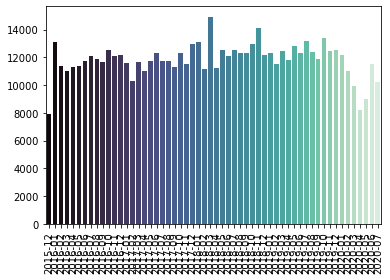

In [10]:
sns.barplot(list(dico.keys()), list(dico.values()), palette='mako')
plt.xticks(rotation='vertical')
plt.show()

In [11]:
def split_type(typ):
        spl = typ.split(': ')
        return spl[0]

In [12]:
types = df.title.apply(split_type).values

In [13]:
dico_types = {}

x = 0
for key, value in dico.items():
    typ = types[x:x + value]
    x = value
    dico_types[key] = sorted(dict(Counter(typ)).items())

In [14]:
type_df = pd.DataFrame(columns=['date', 'EMS', 'Fire', 'Traffic'])

for key, value in dico_types.items():
    type_df = type_df.append({'date' :key, 'EMS': value[0][1], 'Fire': value[1][1], 'Traffic':value[2][1]}, ignore_index=True)

In [15]:
EMS = type_df.EMS.values
Fire = type_df.Fire.values
Traffic = type_df.Traffic.values

bars = np.add(EMS, Fire).tolist()

r = [i for i in range(len(type_df))]
names = type_df.date.values
barWidth = 1

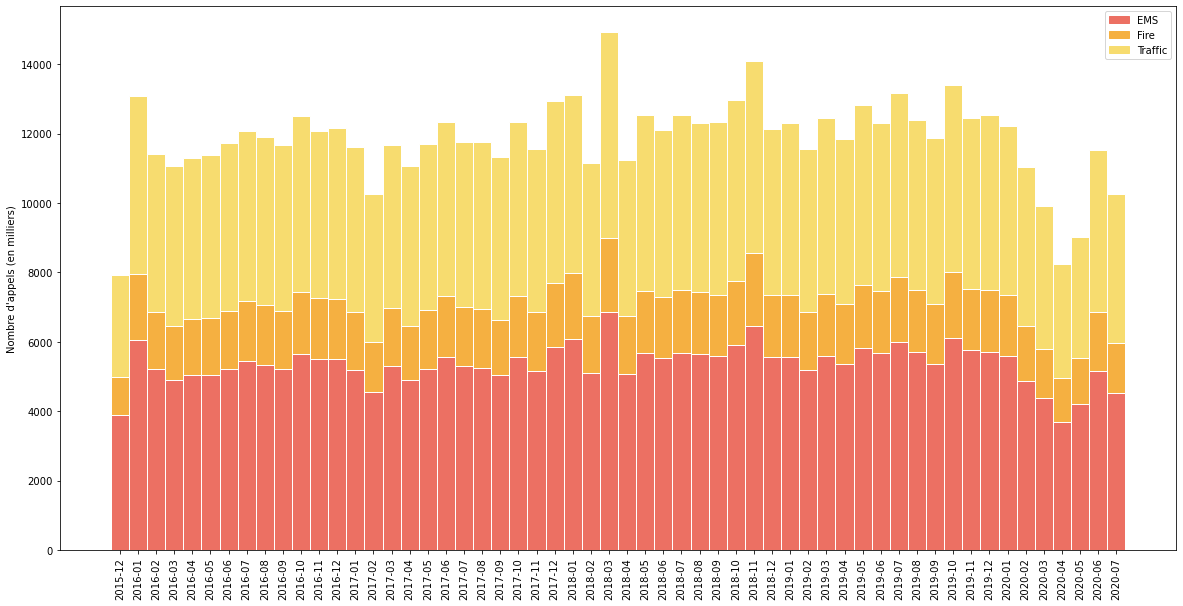

In [16]:
import matplotlib.patches as mpatches

plt.figure(figsize=(20,10))
plt.bar(r, EMS, color='#EC7063', edgecolor='white', width=barWidth)
# Create green bars (middle), on top of the firs ones
plt.bar(r, Fire, bottom=EMS, color='#F5B041', edgecolor='white', width=barWidth)
# Create green bars (top)
plt.bar(r, Traffic, bottom=bars, color='#F7DC6F', edgecolor='white', width=barWidth)
 
# Custom X axis
plt.xticks(r, names, rotation='vertical')
plt.ylabel("Nombre d'appels (en milliers)")

pop_a = mpatches.Patch(color='#EC7063', label='EMS')
pop_b = mpatches.Patch(color='#F5B041', label='Fire')
pop_c = mpatches.Patch(color='#F7DC6F', label='Traffic')

plt.legend(handles=[pop_a, pop_b, pop_c])
# Show graphic
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

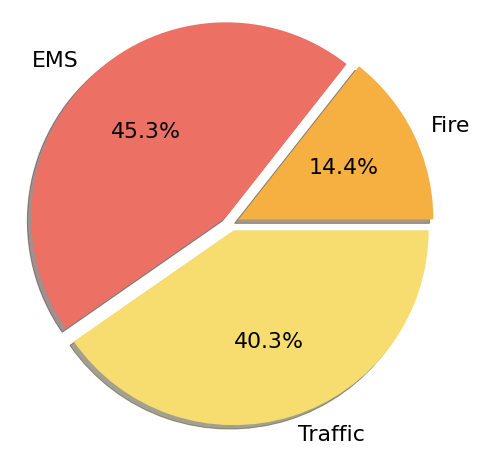

In [85]:
# Création du camembert à partir du dictionnaire
labels = ['Fire', 'EMS', 'Traffic']
sizes = [type_df.Fire.values.sum(), type_df.EMS.values.sum(), type_df.Traffic.values.sum()]
explode = (0.04, 0.04, 0.04)
colors = ['#F5B041', '#EC7063', '#F7DC6F']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, colors=colors, textprops={'fontsize':22})
plt.axis('equal')
plt.show
